[ENGIE’s first open data windfarm](https://opendata-renewables.engie.com/)

[La Haute Borne Data (2017-2020)](https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/table)

[Data Descriptions](https://opendata-renewables.engie.com/explore/dataset/39490fd2-04a2-4622-9042-ce4dd34c2a58/information)

# Pickle & Unpickle windfarm

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import string
import datetime

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# windfarm.to_pickle("./windfarm.pkl")

In [3]:
windfarm2016 = pd.read_pickle("./windfarm2016.pkl")
windfarm2016

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.040001,16.000000,17.00,0.15,4.21000,4.130000,4.28000,0.030000,25.370001,24.980000,25.680000,0.120000,-0.150000,-0.440000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.440000,0.080000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,133.670000,123.090000,143.130000,5.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.510000,9.00,8.8,9.05,0.02,50.000000,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.000000,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,133.670000,NaN,NaN,NaN,133.670000,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.000000,16.000000,16.00,0.00,4.07000,4.030000,4.10000,0.010000,24.190001,23.980000,24.360001,0.060000,-0.130000,-0.430000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.430000,0.070000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,150.060000,123.090000,205.460010,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.150000,8.66,8.5,8.75,0.07,50.020000,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.000000,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,150.060000,NaN,NaN,NaN,150.060000,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.000000,45.000000,45.000000,0.00,9.000000,9.000000,9.94,0.05,94.43000,73.129997,107.93000,8.530000,28.719999,28.450001,28.969999,0.080000,-1.310000,-1.780000,-0.930000,0.140000,0.000000,0.000000,0.090000,0.000000,1.310000,0.930000,1.780000,0.140000,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,2

In [4]:
windfarm = pd.read_pickle("./windfarm.pkl")
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,2017-02-08,07:00:00,2017,2,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,38.369999,17.6800,52.41000,9.390000,2.39,2.06,2.69,0.09,-1.89000,-2.36000,-1.40000,0.150000,0.000000,0.000000,0.000000,0.00,1.89000,1.40000,2.36000,0.15,1.00,1.0,1.00,0.0,38.110001,17.27,51.919998,9.400000,33.410000,33.200001,33.599998,0.14,30.790001,30.600000,30.850000,0.03,45.590000,45.299999,45.799999,0.11,35.360001,35.099998,35.599998,0.15,37.939999,37.799999,38.000000,0.08,34.130001,31.799999,35.700001,1.04,39.580002,39.049999,40.200001,0.40,318.12000,318.12000,318.12000,0.00,20.610001,20.500000,20.799999,0.08,0.14,0.00,1.94,0.44,0.22,0.00,1.93,0.53,0.18,0.00,1.89,0.44,358.049990,298.76999,54.560001,12.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.939999,-19.350000,96.449997,12.05,4.80,4.8,4.90,0.01,50.000000,49.959999,50.029999,0.01,698.40002,696.01001,708.03003,2.40,0.33,0.00,0.49,0.16,19.020000,19.0,19.100000,0.04,-18.889999,-438.32999,0.00000,79.82000,NaN,NaN,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,2017-01-26,01:40:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1204.140000,1195.8101,1208.66000,3.260000,1796.71,1764.35,1816.86,10.58,197.32001,186.07001,200.96001,2.150000,22.200001,16.120001,25.110001,1.04,198.58000,186.92999,202.14999,2.17,0.99,1.0,0.99,0.0,1205.520000,1197.17,1210.060100,3.250000,40.639999,40.200001,41.099998,0.17,29.379999,29.150000,29.600000,0.08,54.580002,53.500000,55.799999,0.37,64.800003,64.550003,65.000000,0.08,64.400002,64.300003,64.599998,0.08,54.959999,54.700001,55.599998,0.12,56.209999,56.000000,56.450001,0.07,63.48000,63.48000,63.48000,0.00,21.900000,21.700001,22.200001,0.13,4.33,3.42,5.54,0.39,5.38,3.74,6.69,0.46,4.85,3.67,6.01,0.39,74.470001,9.47000,108.520000,9.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,-54.009998,45.029999,9.74,-7.16,-7.3,-6.90,0.11,50.009998,49.980000,50.029999,0.01,704.65997,703.42999,705.90002,0.45,11.48,11.37,11.54,0.03,21.610001,21.6,21.799999,0.03,1562.970000,1481.31010,1586.53000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,2017-01-26,12:50:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1179.860000,1060.6200,1287.86000,49.009998,1662.15,1251.04,2029.50,164.30,176.45000,108.74000,245.96001,29.559999,18.620001,11.780000,24.469999,2.48,177.53000,110.14000,246.80000,29.35,0.99,1.0,0.98,0.0,1181.700000,1062.28,1289.950000,49.110001,49.509998,48.849998,50.099998,0.21,37.349998,37.000000,37.700001,0.13,63.990002,62.599998,65.500000,0.56,66.800003,66.099998,67.349998,0.27,66.290001,65.750000,66.900002,0.34,56.830002,56.450001,57.150002,0.11,58.570000,58.299999,59.049999,0.09,70.07000,70.07000,70.07000,0.00,27.410000,27.299999,27.700001,0.11,4.89,3.64,6.39,0.52,5.19,3.65,6.69,0.52,5.04,3.70,6.38,0.48,73.949997,328.78000,122.340000,13.83,NaN,NaN,NaN,NaN

In [5]:
# Append 2 dfs
windfarm = windfarm2016.append(windfarm)

In [6]:
windfarm['Date_time'] = pd.to_datetime(windfarm.Date_time, utc=True)

# Break up windfarm df into 4 dfs based on turbine

In [7]:
windfarm.Wind_turbine_name.value_counts()

R80711    107131
R80736    107131
R80721    107131
R80790    106987
Name: Wind_turbine_name, dtype: int64

In [8]:
wf_R80721 = windfarm[windfarm['Wind_turbine_name']== 'R80721'].reset_index()

In [9]:
wf_R80721 = wf_R80721.drop(columns=['index'])

In [10]:
wf_R80711 = windfarm[windfarm['Wind_turbine_name']== 'R80711'].reset_index()

In [11]:
wf_R80711 = wf_R80711.drop(columns=['index'])

In [12]:
wf_R80736 = windfarm[windfarm['Wind_turbine_name']== 'R80736'].reset_index()

In [13]:
wf_R80736 = wf_R80736.drop(columns=['index'])

In [14]:
wf_R80790 = windfarm[windfarm['Wind_turbine_name']== 'R80790'].reset_index()

In [15]:
wf_R80790 = wf_R80790.drop(columns=['index'])

# Plot Distributions for various features

- *Distplot*:  

    - Think of the y-axis on a density plot as a value only for relative comparisons between different categories.

    - The y-axis is the probability density, which is the probability per unit on the x-axis.

**Skewnewss**

skewness = 0 : normally distributed.

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

**Kurtosis** describes the peakedness of the distribution.

- If the distribution is tall and thin it is called a *leptokurtic* distribution. Values in a leptokurtic distribution are near the mean or at the extremes.

- A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called *platykurtic* distribution.

- A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a *mesokurtic* distribution. A mesokurtic distribution looks more close to a normal distribution.

*Kurtosis* is the fourth central moment divided by the square of the variance:
- If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution. 
- The value is often compared to the kurtosis of the normal distribution, which is equal to 3. 
- If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).

It is a measure of the “tailedness” i.e. descriptor of shape of probability distribution of a real-valued random variable.

## Distribution of Pitch_angle

In [16]:
wf_R80711['Ba_avg'].describe()

count    106193.000000
mean          9.919708
std          23.063081
min          -1.000000
25%          -0.990000
50%          -0.990000
75%           0.270000
max         116.510000
Name: Ba_avg, dtype: float64

A negative angle is the angle when the terminal side is rotated in a clockwise direction.

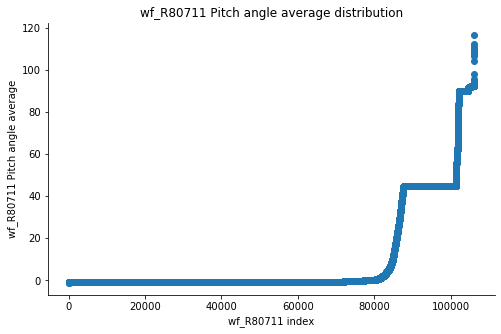

In [17]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(wf_R80711.shape[0]), np.sort(wf_R80711['Ba_avg'].values))
plt.xlabel('wf_R80711 index')
plt.ylabel('wf_R80711 Pitch angle average')
plt.title("wf_R80711 Pitch angle average distribution")
sns.despine()

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


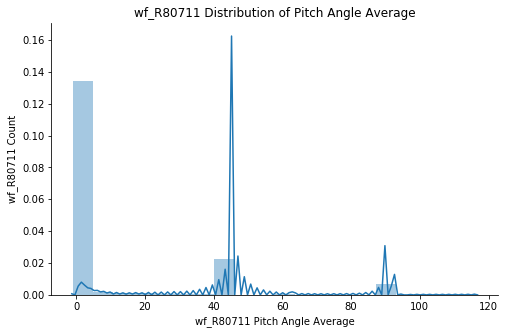

In [18]:
f = plt.figure(figsize=(8,5))

sns.distplot(wf_R80711['Ba_avg'],bins = 20)
plt.title('wf_R80711 Distribution of Pitch Angle Average')
plt.xlabel('wf_R80711 Pitch Angle Average')
plt.ylabel('wf_R80711 Count')
sns.despine()

In [19]:
print("Skewness: %f" % wf_R80711['Ba_avg'].skew())
print("Kurtosis: %f" % wf_R80711['Ba_avg'].kurt())

Skewness: 2.162281
Kurtosis: 3.879082


skewness > 0 : more weight in the left tail of the distribution.

Kurtosis around 3 means normally distributed data.

In [20]:
wf_R80721['Ba_avg'].describe()

count    106439.000000
mean         11.513344
std          23.589703
min          -1.530000
25%          -1.000000
50%          -0.970000
75%           4.660000
max         120.920000
Name: Ba_avg, dtype: float64

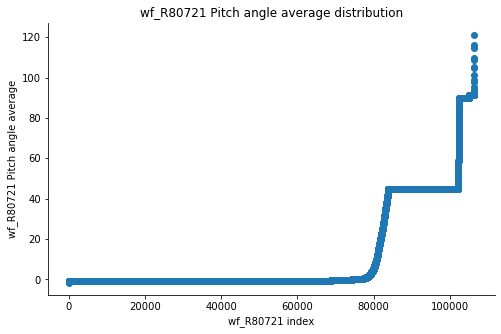

In [21]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(wf_R80721.shape[0]), np.sort(wf_R80721['Ba_avg'].values))
plt.xlabel('wf_R80721 index')
plt.ylabel('wf_R80721 Pitch angle average')
plt.title("wf_R80721 Pitch angle average distribution")
sns.despine()

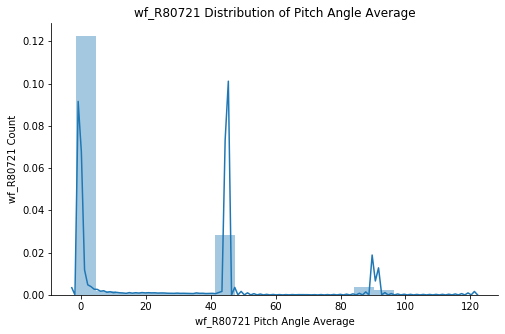

In [22]:
f = plt.figure(figsize=(8,5))

sns.distplot(wf_R80721['Ba_avg'],bins = 20)
plt.title('wf_R80721 Distribution of Pitch Angle Average')
plt.xlabel('wf_R80721 Pitch Angle Average')
plt.ylabel('wf_R80721 Count')
sns.despine()

In [23]:
print("Skewness: %f" % wf_R80721['Ba_avg'].skew())
print("Kurtosis: %f" % wf_R80721['Ba_avg'].kurt())

Skewness: 1.840337
Kurtosis: 2.572710


skewness > 0 : more weight in the left tail of the distribution.

Kurtosis around 3 means normally distributed data.

In [24]:
wf_R80736['Ba_avg'].describe()

count    106031.000000
mean         11.686031
std          24.220579
min          -1.010000
25%          -0.990000
50%          -0.960000
75%           4.285000
max         132.480000
Name: Ba_avg, dtype: float64

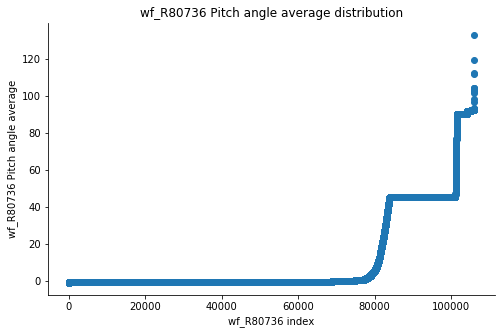

In [25]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(wf_R80736.shape[0]), np.sort(wf_R80736['Ba_avg'].values))
plt.xlabel('wf_R80736 index')
plt.ylabel('wf_R80736 Pitch angle average')
plt.title('wf_R80736 Pitch angle average distribution')
sns.despine()

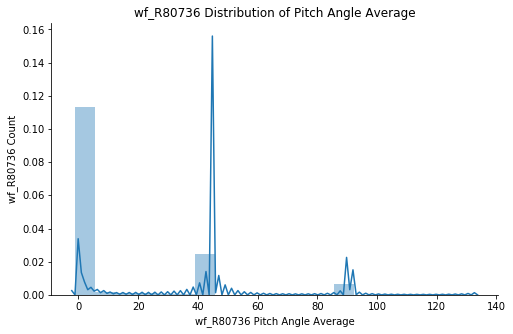

In [26]:
f = plt.figure(figsize=(8,5))

sns.distplot(wf_R80736['Ba_avg'],bins = 20)
plt.title('wf_R80736 Distribution of Pitch Angle Average')
plt.xlabel('wf_R80736 Pitch Angle Average')
plt.ylabel('wf_R80736 Count')
sns.despine()

In [27]:
print("Skewness: %f" % wf_R80736['Ba_avg'].skew())
print("Kurtosis: %f" % wf_R80736['Ba_avg'].kurt())

Skewness: 1.886799
Kurtosis: 2.698411


skewness > 0 : more weight in the left tail of the distribution.

Kurtosis around 3 means normally distributed data.

In [28]:
wf_R80790['Ba_avg'].describe()

count    106487.000000
mean         10.925715
std          24.494469
min          -1.000000
25%          -1.000000
50%          -0.990000
75%           0.490000
max         118.630000
Name: Ba_avg, dtype: float64

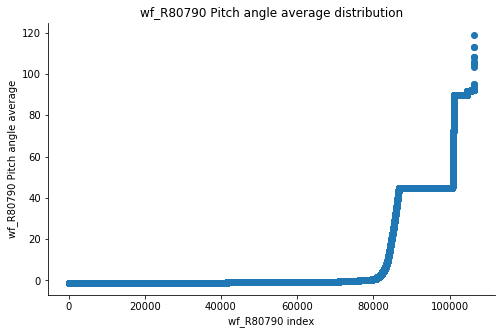

In [29]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(wf_R80790.shape[0]), np.sort(wf_R80790['Ba_avg'].values))
plt.xlabel('wf_R80790 index')
plt.ylabel('wf_R80790 Pitch angle average')
plt.title('wf_R80790 Pitch angle average distribution')
sns.despine()

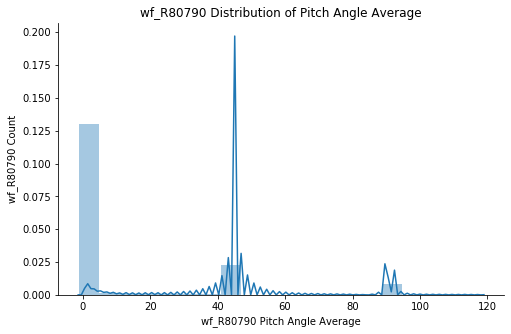

In [30]:
f = plt.figure(figsize=(8,5))

sns.distplot(wf_R80790['Ba_avg'],bins = 20)
plt.title('wf_R80790 Distribution of Pitch Angle Average')
plt.xlabel('wf_R80790 Pitch Angle Average')
plt.ylabel('wf_R80790 Count')
sns.despine()

In [31]:
print("Skewness: %f" % wf_R80790['Ba_avg'].skew())
print("Kurtosis: %f" % wf_R80790['Ba_avg'].kurt())

Skewness: 2.070648
Kurtosis: 3.345609


skewness > 0 : more weight in the left tail of the distribution.

Kurtosis around 3 means normally distributed data.

## Distribution of Converter_torque

In [32]:
windfarm['Cm_avg'].describe()

count    425153.000000
mean       2190.539472
std        2283.773920
min       -4377.669900
25%         490.510010
50%        1628.720000
75%        2974.669900
max       10965.400000
Name: Cm_avg, dtype: float64

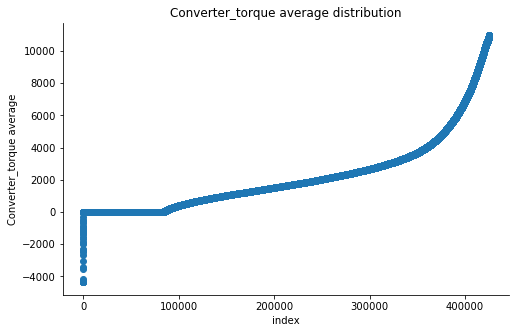

In [33]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Cm_avg'].values))
plt.xlabel('index')
plt.ylabel('Converter_torque average')
plt.title("Converter_torque average distribution")
sns.despine()

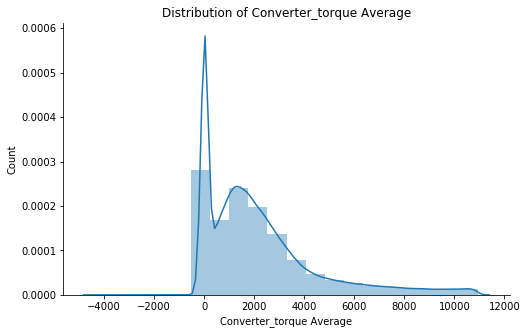

In [34]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Cm_avg'],bins = 20)
plt.title('Distribution of Converter_torque Average')
plt.xlabel('Converter_torque Average')
plt.ylabel('Count')
sns.despine()

In [35]:
print("Skewness: %f" % windfarm['Cm_avg'].skew())
print("Kurtosis: %f" % windfarm['Cm_avg'].kurt())

Skewness: 1.601053
Kurtosis: 2.551350


skewness > 0 : more weight in the left tail of the distribution.

Converter_torque average density leptokurtic distribution around 0. Mesokurtic distribution near median = 1658 and mean = 2252.

## Distribution of Power_factor

**Should equal Active_power/Apparent_power (P/S)**

In [36]:
windfarm['Cosphi_avg'].describe()

count    425153.000000
mean          0.991878
std           0.034772
min          -0.990000
25%           0.990000
50%           1.000000
75%           1.000000
max           1.000000
Name: Cosphi_avg, dtype: float64

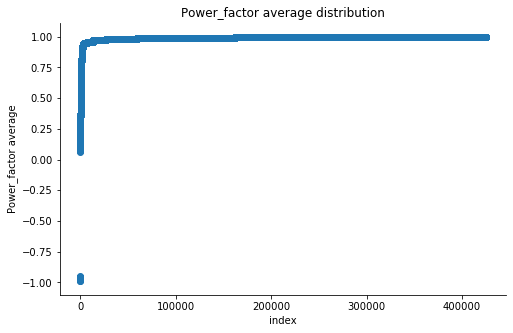

In [37]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Cosphi_avg'].values))
plt.xlabel('index')
plt.ylabel('Power_factor average')
plt.title('Power_factor average distribution')
sns.despine()

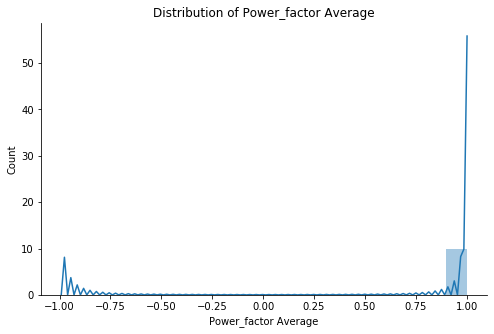

In [38]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Cosphi_avg'], bins = 20)
plt.title('Distribution of Power_factor Average')
plt.xlabel('Power_factor Average')
plt.ylabel('Count')
sns.despine()

In [39]:
print("Skewness: %f" % windfarm['Cosphi_avg'].skew())
print("Kurtosis: %f" % windfarm['Cosphi_avg'].kurt())

Skewness: -22.493149
Kurtosis: 785.902692


skewness < 0 : more weight in the right tail of the distribution.

High kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean. However, in this case, the distribution is too peaked around the mean, ~1.

Kurtosis is only useful when used in conjunction with standard deviation. It is possible that an investment might have a high kurtosis, which is bad, but the overall standard deviation is low, which is good. In this case STD is 0.030760.

## Distribution of Generator_converter_speed

In [40]:
windfarm['DCs_avg'].describe()

count    425153.000000
mean       1089.888937
std         591.924400
min        -574.890000
25%         967.669980
50%        1191.650000
75%        1571.630000
max        1807.600000
Name: DCs_avg, dtype: float64

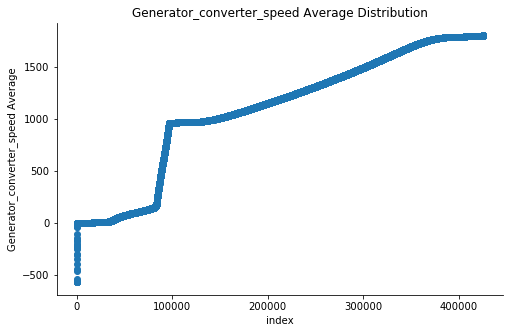

In [41]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['DCs_avg'].values))
plt.xlabel('index')
plt.ylabel('Generator_converter_speed Average')
plt.title('Generator_converter_speed Average Distribution')
sns.despine()

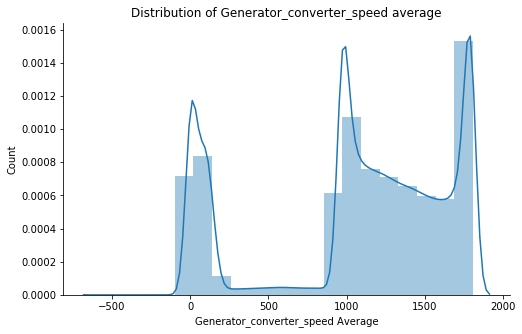

In [42]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['DCs_avg'], bins = 20)
plt.title('Distribution of Generator_converter_speed average')
plt.xlabel('Generator_converter_speed Average')
plt.ylabel('Count')
sns.despine()

In [43]:
print("Skewness: %f" % windfarm['DCs_avg'].skew())
print("Kurtosis: %f" % windfarm['DCs_avg'].kurt())

Skewness: -0.714752
Kurtosis: -0.700307


skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 1088).

Slight Negative kurtosis has less in the tails than the normal distribution. A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Looks like distributions fo Generator_speed.

## Distribution of Generator_bearing_1_temperature

In [44]:
windfarm['Db1t_avg'].describe()

count    425153.000000
mean         39.665214
std           7.372736
min           3.800000
25%          36.410000
50%          40.650002
75%          44.680000
max          81.880000
Name: Db1t_avg, dtype: float64

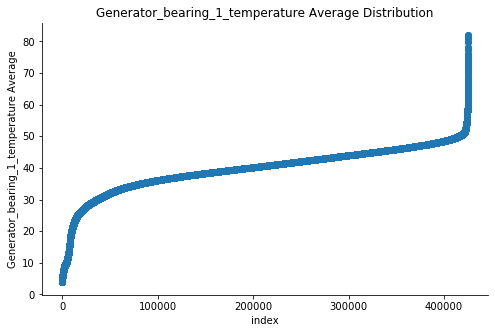

In [45]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Db1t_avg'].values))
plt.xlabel('index')
plt.ylabel('Generator_bearing_1_temperature Average')
plt.title('Generator_bearing_1_temperature Average Distribution')
sns.despine()

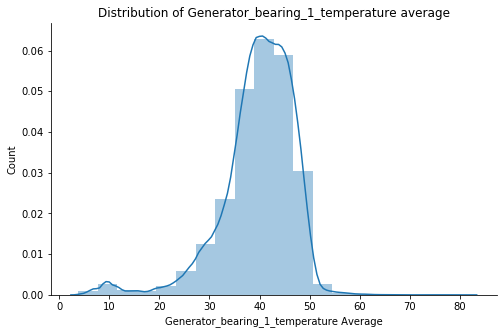

In [46]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Db1t_avg'], bins = 20) 
plt.title('Distribution of Generator_bearing_1_temperature average')
plt.xlabel('Generator_bearing_1_temperature Average')
plt.ylabel('Count')
sns.despine()

In [47]:
print("Skewness: %f" % windfarm['Db1t_avg'].skew())
print("Kurtosis: %f" % windfarm['Db1t_avg'].kurt())

Skewness: -1.423584
Kurtosis: 3.742030


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 39.276043).

Kurtosis is slightly more than 3, which is normal distribution. The Generator_bearing_1_temperature average has slightly heavier tails than a normal distribution (more in the tails).

## Distribution of Generator_bearing_2_temperature

In [48]:
windfarm['Db2t_avg'].describe()

count    425153.000000
mean         35.900146
std           6.497765
min           0.380000
25%          33.349998
50%          36.780000
75%          39.830002
max         276.410000
Name: Db2t_avg, dtype: float64

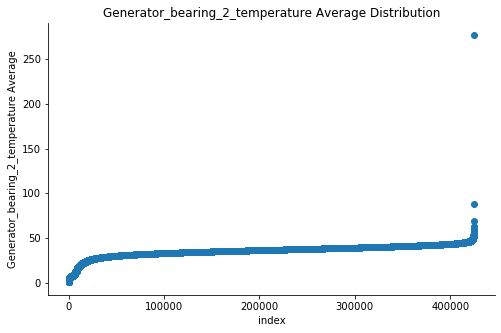

In [49]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Db2t_avg'].values))
plt.xlabel('index')
plt.ylabel('Generator_bearing_2_temperature Average')
plt.title('Generator_bearing_2_temperature Average Distribution')
sns.despine()

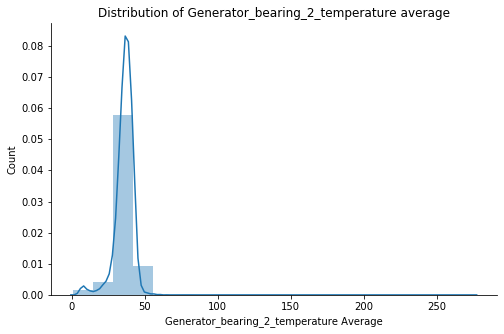

In [50]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Db2t_avg'], bins = 20) 
plt.title('Distribution of Generator_bearing_2_temperature average')
plt.xlabel('Generator_bearing_2_temperature Average')
plt.ylabel('Count')
sns.despine()

In [51]:
print("Skewness: %f" % windfarm['Db2t_avg'].skew())
print("Kurtosis: %f" % windfarm['Db2t_avg'].kurt())

Skewness: -1.610328
Kurtosis: 10.075402


Outlier at 276.410000

Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 35.782009).

Leptokurtic distribution. 

Data sets with high kurtosis tend to have heavy tails, or outliers.


## Distribution of Generator_speed average

In [52]:
windfarm['Ds_avg'].describe()

count    424075.000000
mean       1093.604709
std         591.056683
min          -0.180000
25%         969.979980
50%        1194.380000
75%        1574.410000
max        1804.569900
Name: Ds_avg, dtype: float64

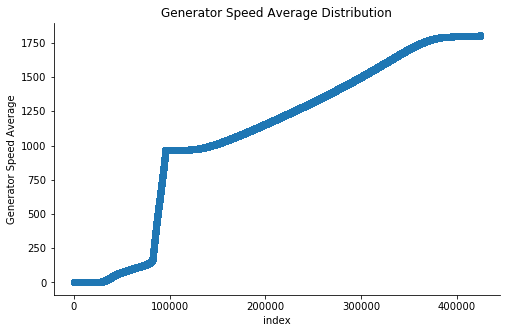

In [53]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Ds_avg'].values))
plt.xlabel('index')
plt.ylabel('Generator Speed Average')
plt.title('Generator Speed Average Distribution')
sns.despine()

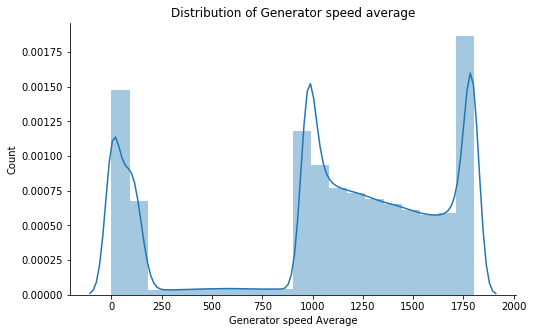

In [54]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Ds_avg'].dropna(), bins = 20) # drop NaN values
plt.title('Distribution of Generator speed average')
plt.xlabel('Generator speed Average')
plt.ylabel('Count')
sns.despine()

In [55]:
print("Skewness: %f" % windfarm['Ds_avg'].skew())
print("Kurtosis: %f" % windfarm['Ds_avg'].kurt())

Skewness: -0.721508
Kurtosis: -0.682370


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 1095).

Slight Negative kurtosis has less in the tails than the normal distribution. A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Looks like distributions for Generator_converter_speed.

## Distribution of Generator_stator_temperature

In [56]:
windfarm['Dst_avg'].describe()

count    425153.000000
mean         56.070613
std          10.484259
min          -0.200000
25%          54.480000
50%          58.230000
75%          62.130001
max         101.150000
Name: Dst_avg, dtype: float64

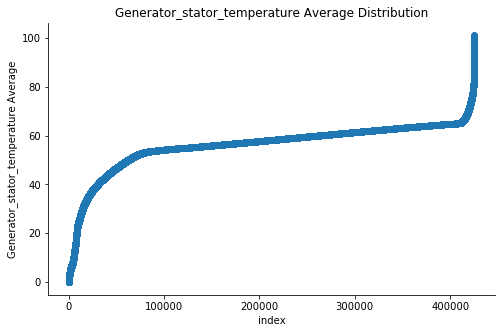

In [57]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Dst_avg'].values))
plt.xlabel('index')
plt.ylabel('Generator_stator_temperature Average')
plt.title('Generator_stator_temperature Average Distribution')
sns.despine()

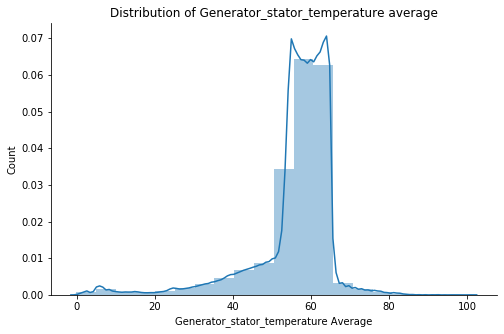

In [58]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Dst_avg'], bins = 20) 
plt.title('Distribution of Generator_stator_temperature average')
plt.xlabel('Generator_stator_temperature Average')
plt.ylabel('Count')
sns.despine()

In [59]:
print("Skewness: %f" % windfarm['Dst_avg'].skew())
print("Kurtosis: %f" % windfarm['Dst_avg'].kurt())

Skewness: -2.366732
Kurtosis: 7.744184


Skewness less than 0 = more weight in the right tail of the distribution (> mean = 55).

Kurtosis of 6.7, 3.7 + Normal Distribution => Data sets with high kurtosis tend to have heavy tails, or outliers.

Double peaked leptokurtic distribution.



## Distribution of Gearbox_bearing_1_temperature

In [60]:
windfarm['Gb1t_avg'].describe()

count    425153.000000
mean         60.295632
std          11.742900
min           8.280000
25%          56.439999
50%          63.509998
75%          67.610001
max          86.210000
Name: Gb1t_avg, dtype: float64

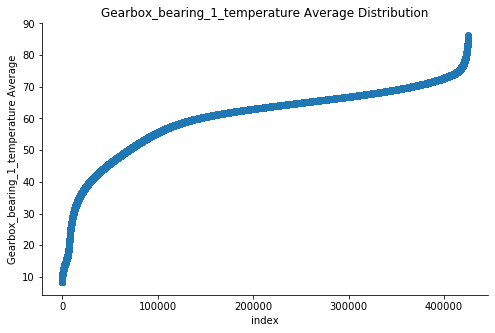

In [61]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Gb1t_avg'].values))
plt.xlabel('index')
plt.ylabel('Gearbox_bearing_1_temperature Average')
plt.title('Gearbox_bearing_1_temperature Average Distribution')
sns.despine()

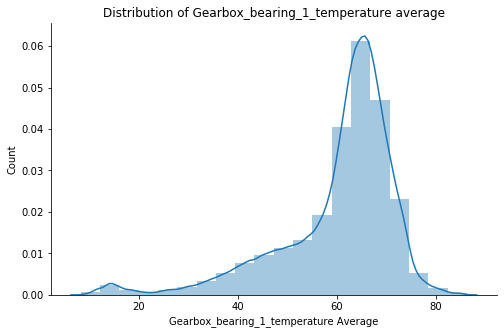

In [62]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Gb1t_avg'], bins = 20)
plt.title('Distribution of Gearbox_bearing_1_temperature average')
plt.xlabel('Gearbox_bearing_1_temperature Average')
plt.ylabel('Count')
sns.despine()

In [63]:
print("Skewness: %f" % windfarm['Gb1t_avg'].skew())
print("Kurtosis: %f" % windfarm['Gb1t_avg'].kurt())

Skewness: -1.603914
Kurtosis: 3.116723


Skewness less than 0 = more weight in the right tail of the distribution (> mean = 60).

Almost normally distributed kurtosis. Normal Distribution for kurtosis = 3.

## Distribution of Gearbox_bearing_2_temperature

In [64]:
windfarm['Gb2t_avg'].describe()

count    425153.000000
mean         60.954222
std          12.045536
min          10.200000
25%          55.490000
50%          64.440002
75%          69.639999
max          87.150002
Name: Gb2t_avg, dtype: float64

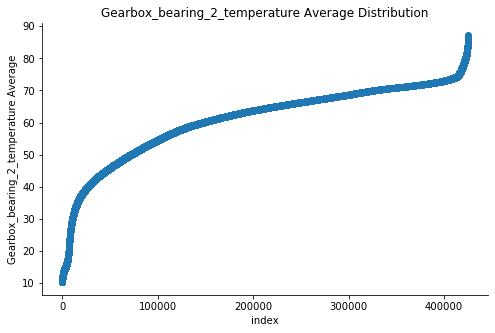

In [65]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Gb2t_avg'].values))
plt.xlabel('index')
plt.ylabel('Gearbox_bearing_2_temperature Average')
plt.title('Gearbox_bearing_2_temperature Average Distribution')
sns.despine()

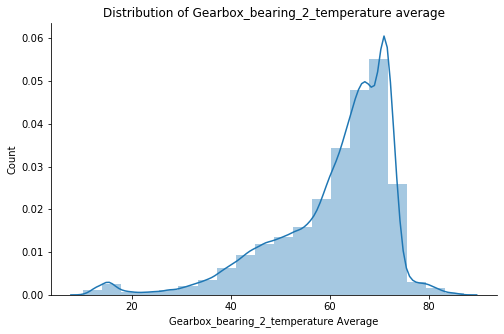

In [66]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Gb2t_avg'], bins = 20) 
plt.title('Distribution of Gearbox_bearing_2_temperature average')
plt.xlabel('Gearbox_bearing_2_temperature Average')
plt.ylabel('Count')
sns.despine()

In [67]:
print("Skewness: %f" % windfarm['Gb2t_avg'].skew())
print("Kurtosis: %f" % windfarm['Gb2t_avg'].kurt())

Skewness: -1.452357
Kurtosis: 2.461919


Skewness less than 0 = more weight in the right tail of the distribution (> mean = 60).

Almost normally distributed in terms of kurtosis. Normal Distribution for kurtosis = 3.

Leptokurtic distribution around 70. 

## Distribution of Gearbox_inlet_temperature

In [68]:
windfarm['Git_avg'].describe()

count    425153.000000
mean         50.908503
std           8.010889
min           5.300000
25%          48.950001
50%          52.709999
75%          56.029999
max          72.900000
Name: Git_avg, dtype: float64

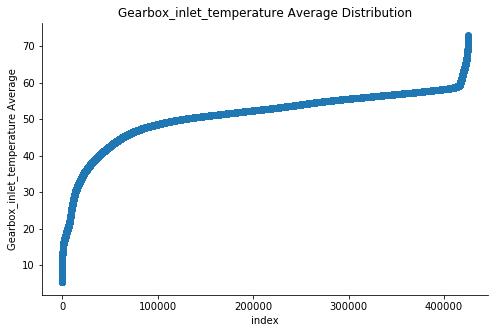

In [69]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Git_avg'].values))
plt.xlabel('index')
plt.ylabel('Gearbox_inlet_temperature Average')
plt.title('Gearbox_inlet_temperature Average Distribution')
sns.despine()

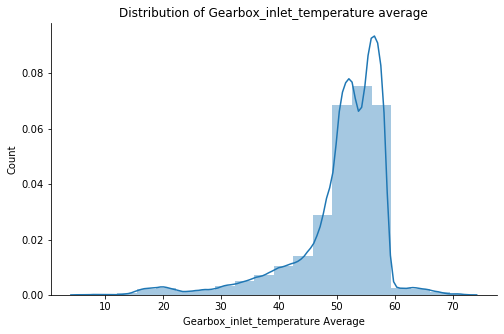

In [70]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Git_avg'], bins = 20) 
plt.title('Distribution of Gearbox_inlet_temperature average')
plt.xlabel('Gearbox_inlet_temperature Average')
plt.ylabel('Count')
sns.despine()

In [71]:
print("Skewness: %f" % windfarm['Git_avg'].skew())
print("Kurtosis: %f" % windfarm['Git_avg'].kurt())

Skewness: -1.958199
Kurtosis: 4.981181


Skewness less than 0 = more weight in the right tail of the distribution (> mean = 50.79).

Kurtosis = 4.2 = 1.2 > than Normal Distribution.

## Distribution of Gearbox_oil_sump_temperature

In [72]:
windfarm['Gost_avg'].describe()

count    425153.000000
mean         54.146561
std           7.656864
min          10.890000
25%          52.730000
50%          56.470001
75%          58.189999
max          84.769997
Name: Gost_avg, dtype: float64

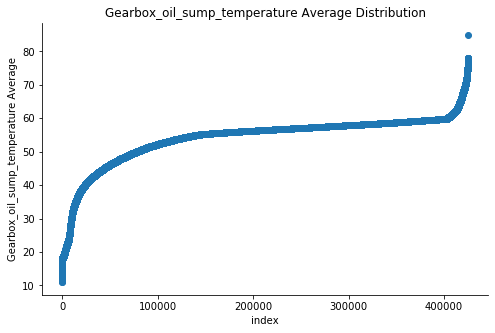

In [73]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Gost_avg'].values))
plt.xlabel('index')
plt.ylabel('Gearbox_oil_sump_temperature Average')
plt.title('Gearbox_oil_sump_temperature Average Distribution')
sns.despine()

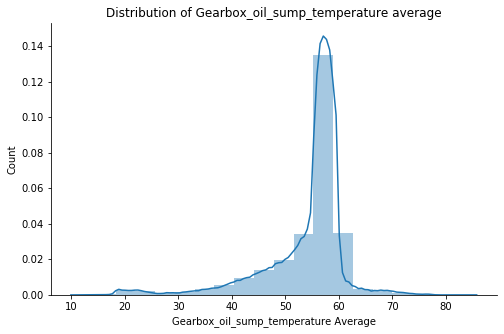

In [74]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Gost_avg'], bins = 20) 
plt.title('Distribution of Gearbox_oil_sump_temperature average')
plt.xlabel('Gearbox_oil_sump_temperature Average')
plt.ylabel('Count')
sns.despine()

In [75]:
print("Skewness: %f" % windfarm['Gost_avg'].skew())
print("Kurtosis: %f" % windfarm['Gost_avg'].kurt())

Skewness: -2.077517
Kurtosis: 6.040062


Outlier at 84.769997?

Skewness less than 0 = more weight in the right tail of the distribution (> mean = 54).

Kurtosis = 4.8 = 1.8 > than Normal Distribution, but appears to be leptokurtic in distribution closer to median and 75%.

## Distribution of Nacelle_angle_corrected

In [76]:
windfarm['Na_c_avg'].describe()

count    243421.000000
mean        181.269165
std          93.911135
min           0.010000
25%          89.309998
50%         203.140000
75%         249.030000
max         360.000000
Name: Na_c_avg, dtype: float64

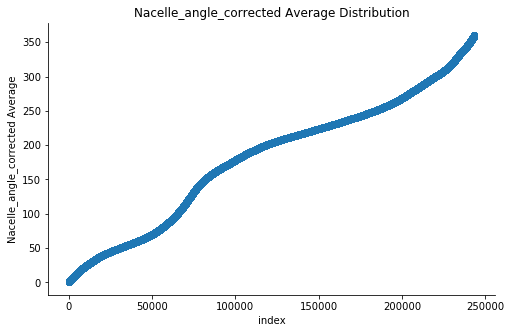

In [77]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Na_c_avg'].values))
plt.xlabel('index')
plt.ylabel('Nacelle_angle_corrected Average')
plt.title('Nacelle_angle_corrected Average Distribution')
sns.despine()

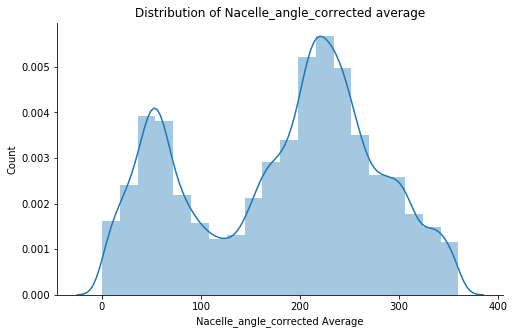

In [78]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Na_c_avg'].dropna(), bins = 20)  # drop NaNs
plt.title('Distribution of Nacelle_angle_corrected average')
plt.xlabel('Nacelle_angle_corrected Average')
plt.ylabel('Count')
sns.despine()

In [79]:
print("Skewness: %f" % windfarm['Na_c_avg'].skew())
print("Kurtosis: %f" % windfarm['Na_c_avg'].kurt())

Skewness: -0.256270
Kurtosis: -1.030114


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 173).

A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Distribution Nacelle_angle_corrected averages around 50 - 60 and another higher peak around 75% = 236.

## Distribution of Grid_frequency

In [80]:
windfarm['Nf_avg'].describe()

count    425151.000000
mean         49.981684
std           0.682325
min           0.000000
25%          49.980000
50%          49.990002
75%          50.000000
max          50.090000
Name: Nf_avg, dtype: float64

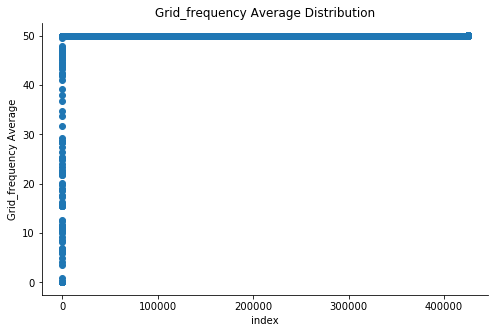

In [81]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Nf_avg'].values))
plt.xlabel('index')
plt.ylabel('Grid_frequency Average')
plt.title('Grid_frequency Average Distribution')
sns.despine()

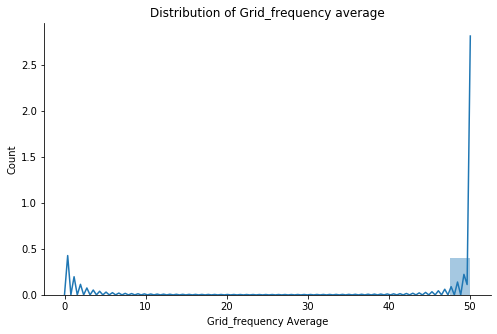

In [82]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Nf_avg'].dropna(), bins = 20)  # drop NaNs
plt.title('Distribution of Grid_frequency average')
plt.xlabel('Grid_frequency Average')
plt.ylabel('Count')
sns.despine()

Shows the Grid Frequency averages are usually around 50, but sometimes around 0

In [83]:
print("Skewness: %f" % windfarm['Nf_avg'].skew())
print("Kurtosis: %f" % windfarm['Nf_avg'].kurt())

Skewness: -65.587945
Kurtosis: 4450.816437


Skewness < 0 : more weight in the right tail of the distribution (> mean = 50).

High kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean. However, in this case, the distribution is too peaked around the mean, ~50.

Kurtosis is only useful when used in conjunction with standard deviation. It is possible that an investment might have a high kurtosis, which is bad, but the overall standard deviation is low, which is good. In this case STD is 0.669809.

## Distribution of Grid voltage average

In [84]:
windfarm['Nu_avg'].describe()

count    425151.000000
mean        699.953694
std          10.763102
min           0.000000
25%         696.670000
50%         699.929990
75%         703.270020
max         729.610000
Name: Nu_avg, dtype: float64

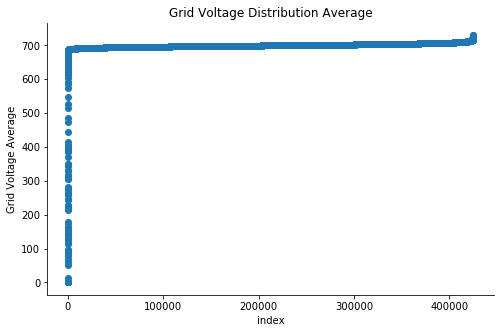

In [85]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Nu_avg'].values))
plt.xlabel('index')
plt.ylabel('Grid Voltage Average')
plt.title('Grid Voltage Distribution Average')
sns.despine()

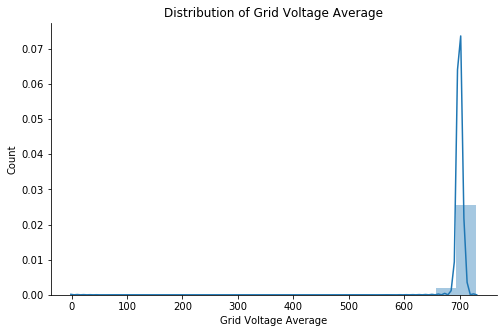

In [86]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Nu_avg'].dropna(), bins = 20) # drop NaN values
plt.title('Distribution of Grid Voltage Average')
plt.xlabel('Grid Voltage Average')
plt.ylabel('Count')
sns.despine()

In [87]:
print("Skewness: %f" % windfarm['Nu_avg'].skew())
print("Kurtosis: %f" % windfarm['Nu_avg'].kurt())

Skewness: -45.930727
Kurtosis: 2768.247581


Skewness < 0 : more weight in the right tail of the distribution (> mean ~ 701).

High kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean. However, in this case, the distribution is too peaked around the mean, ~ 701.

Kurtosis is only useful when used in conjunction with standard deviation. It is possible that an investment might have a high kurtosis, which is bad, but the overall standard deviation is low, which is good. In this case STD is 10.700638, which is not that low. 

There do appear to be outliers for Grid voltage average.

## Distribution of Outdoor Temperature average

In [88]:
windfarm['Ot_avg'].describe()

count    425153.000000
mean         12.147938
std           7.827019
min          -7.970000
25%           6.070000
50%          11.390000
75%          17.830000
max          70.980003
Name: Ot_avg, dtype: float64

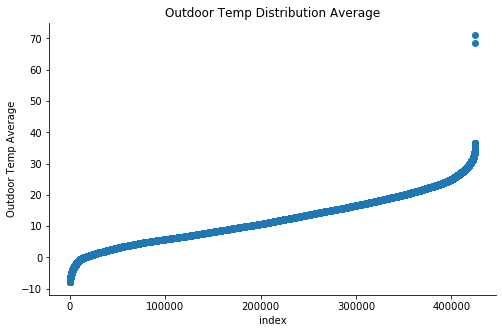

In [89]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Ot_avg'].values))
plt.xlabel('index')
plt.ylabel('Outdoor Temp Average')
plt.title('Outdoor Temp Distribution Average')
sns.despine()

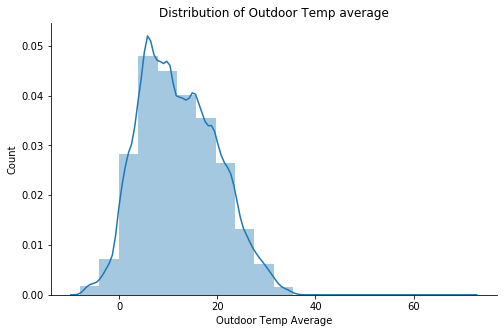

In [90]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Ot_avg'].dropna(), bins = 20) # drop NaN values
plt.title('Distribution of Outdoor Temp average')
plt.xlabel('Outdoor Temp Average')
plt.ylabel('Count')
sns.despine()

In [91]:
print("Skewness: %f" % windfarm['Ot_avg'].skew())
print("Kurtosis: %f" % windfarm['Ot_avg'].kurt())

Skewness: 0.291088
Kurtosis: -0.491004


- Outliers around 70* C, which is 158* F
- Note: a temperature of 45.1* C, 113.18, is the highest recorded temperature in France:
    - [Resource](https://www.independent.co.uk/news/world/europe/france-hottest-temperature-weather-forecast-heatwave-record-latest-a8979206.html)

Skewness very close to 0, which indicates normal distribution, but skewness is v slightly more than 0, which means slightly more weight in the left tail of the distribution (< mean ~12).

Platykurtosis is a statistical measure used to describe a situation in which the peak of the curve of frequency distribution is comparatively flatter than that of normal distribution.

Negative kurtosis: A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

## Distribution of Active_power

In [92]:
windfarm['P_avg'].describe()

count    425444.000000
mean        346.777191
std         442.866072
min         -18.490000
25%          22.030001
50%         177.009990
75%         483.472500
max        2051.120100
Name: P_avg, dtype: float64

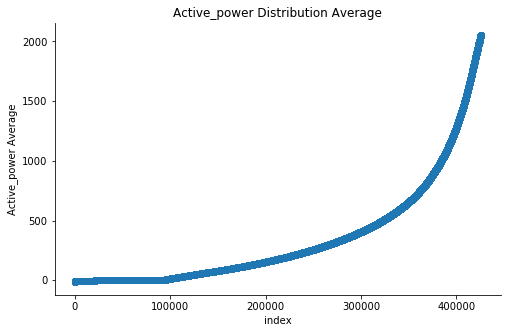

In [93]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['P_avg'].values))
plt.xlabel('index')
plt.ylabel('Active_power Average')
plt.title('Active_power Distribution Average')
sns.despine()

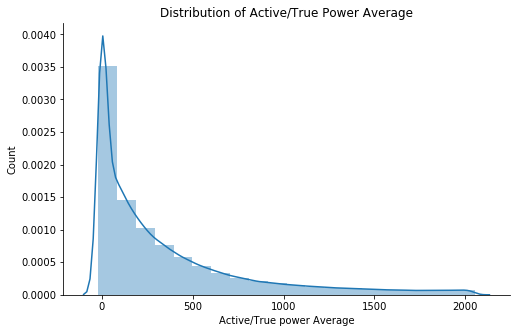

In [94]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['P_avg'], bins = 20) 
plt.title('Distribution of Active/True Power Average')
plt.xlabel('Active/True power Average')
plt.ylabel('Count')
sns.despine()

In [95]:
print("Skewness: %f" % windfarm['P_avg'].skew())
print("Kurtosis: %f" % windfarm['P_avg'].kurt())

Skewness: 1.777933
Kurtosis: 2.797129


skewness > 0 : more weight in the left tail of the distribution (> mean ~361).

Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. The histogram is an effective graphical ...

Not sure if that's true in this case, since mean and std are close (mean ~361 and std ~ 458.

## No Distribution for Pitch_angle_setpoint

In [96]:
windfarm['Pas_avg'].value_counts()

Series([], Name: Pas_avg, dtype: int64)

## Distribution of Reactive_power

In [97]:
windfarm['Q_avg'].describe()

count    421994.000000
mean         26.308366
std          30.509344
min        -196.950000
25%           4.060000
50%          20.110001
75%          33.990000
max         266.700000
Name: Q_avg, dtype: float64

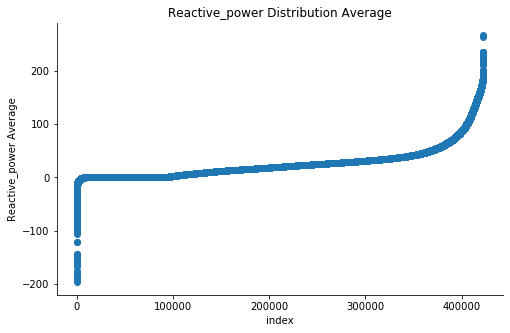

In [98]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Q_avg'].values))
plt.xlabel('index')
plt.ylabel('Reactive_power Average')
plt.title('Reactive_power Distribution Average')
sns.despine()

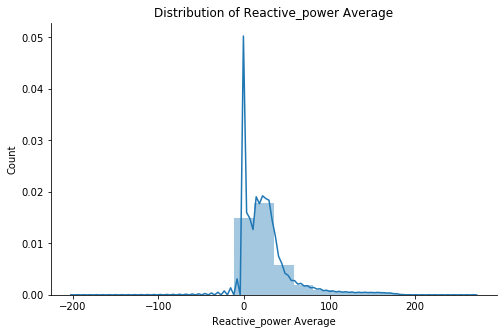

In [99]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Q_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Distribution of Reactive_power Average')
plt.xlabel('Reactive_power Average')
plt.ylabel('Count')
sns.despine()

In [100]:
print("Skewness: %f" % windfarm['Q_avg'].skew())
print("Kurtosis: %f" % windfarm['Q_avg'].kurt())

Skewness: 2.211438
Kurtosis: 6.315452


Outliers at 266.700000?

skewness > 0 : more weight in the left tail of the distribution (> mean ~27).

Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).

## Distribution of Rotor_bearing_temperature

In [101]:
windfarm['Rbt_avg'].describe()

count    425153.000000
mean         27.557936
std           5.778010
min          -0.210000
25%          24.600000
50%          28.070000
75%          31.500000
max          43.070000
Name: Rbt_avg, dtype: float64

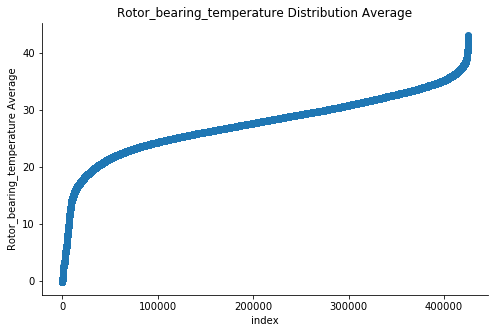

In [102]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Rbt_avg'].values))
plt.xlabel('index')
plt.ylabel('Rotor_bearing_temperature Average')
plt.title('Rotor_bearing_temperature Distribution Average')
sns.despine()

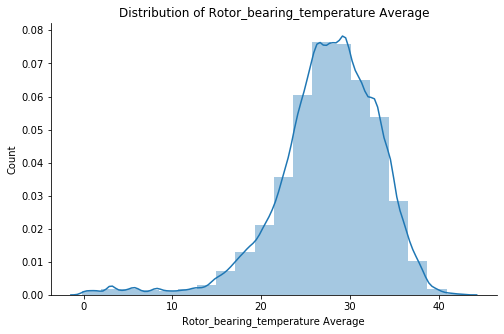

In [103]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Rbt_avg'], bins = 20) 
plt.title('Distribution of Rotor_bearing_temperature Average')
plt.xlabel('Rotor_bearing_temperature Average')
plt.ylabel('Count')
sns.despine()

In [104]:
print("Skewness: %f" % windfarm['Rbt_avg'].skew())
print("Kurtosis: %f" % windfarm['Rbt_avg'].kurt())

Skewness: -1.121016
Kurtosis: 2.853446


Skewness < 0 : more weight in the right tail of the distribution (> mean = 27.463504).

Kurtosis is only .5 more than that of the normal distribution (3). This does appear to be more normally distributed.

## Distribution of Torque

In [105]:
windfarm['Rm_avg'].describe()

count    421812.000000
mean       2057.897952
std        2337.008750
min        -888.669980
25%         244.077503
50%        1412.885000
75%        2912.197500
max       10875.400000
Name: Rm_avg, dtype: float64

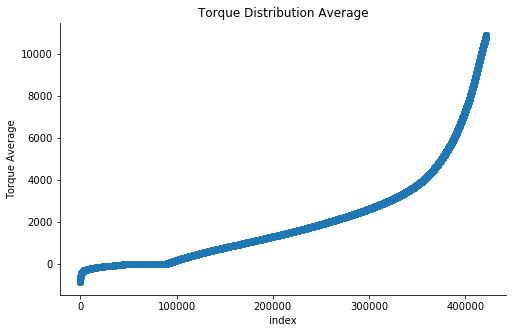

In [106]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Rm_avg'].values))
plt.xlabel('index')
plt.ylabel('Torque Average')
plt.title('Torque Distribution Average')
sns.despine()

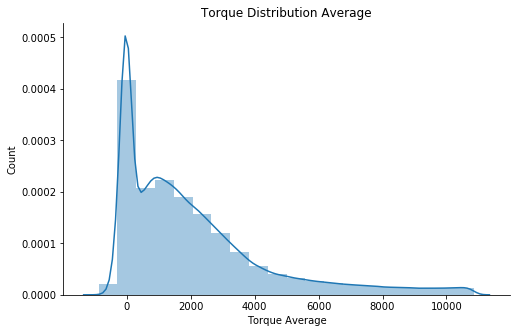

In [107]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Rm_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Torque Distribution Average')
plt.xlabel('Torque Average')
plt.ylabel('Count')
sns.despine()

In [108]:
print("Skewness: %f" % windfarm['Rm_avg'].skew())
print("Kurtosis: %f" % windfarm['Rm_avg'].kurt())

Skewness: 1.585395
Kurtosis: 2.375041


Skewness > 0: more weight in the right tail of the distribution (> mean = 2143.728751).

Leptokurtic density with kurtosis of ~2. There is somewhat normal distribution around the median 1467.

## Distribution of Rotor_speed

In [109]:
windfarm['Rs_avg'].describe()

count    422526.000000
mean         10.459814
std           5.618073
min           0.000000
25%           9.229999
50%          11.400000
75%          15.030000
max          17.220000
Name: Rs_avg, dtype: float64

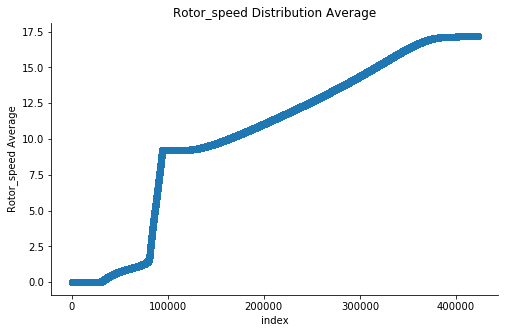

In [110]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Rs_avg'].values))
plt.xlabel('index')
plt.ylabel('Rotor_speed Average')
plt.title('Rotor_speed Distribution Average')
sns.despine()

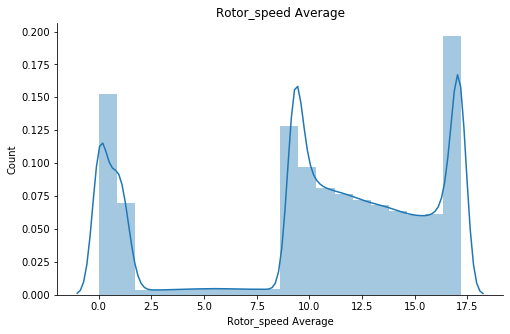

In [111]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Rs_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Rotor_speed Average')
plt.xlabel('Rotor_speed Average')
plt.ylabel('Count')
sns.despine()

In [112]:
print("Skewness: %f" % windfarm['Rs_avg'].skew())
print("Kurtosis: %f" % windfarm['Rs_avg'].kurt())

Skewness: -0.726485
Kurtosis: -0.659459


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean ~ 10.5).

Negative kurtosis has less in the tails than the normal distribution. A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Looks like distributions for Generator_converter_speed and Generator_speed averages.

## Distribution of Hub_temperature

In [113]:
windfarm['Rt_avg'].describe()

count    425153.000000
mean         19.428812
std           6.511671
min           1.780000
25%          14.000000
50%          19.000000
75%          24.010000
max         215.000000
Name: Rt_avg, dtype: float64

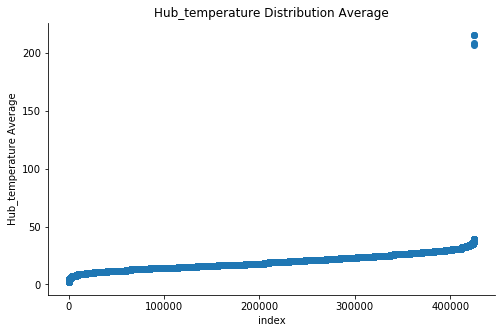

In [114]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Rt_avg'].values))
plt.xlabel('index')
plt.ylabel('Hub_temperature Average')
plt.title('Hub_temperature Distribution Average')
sns.despine()

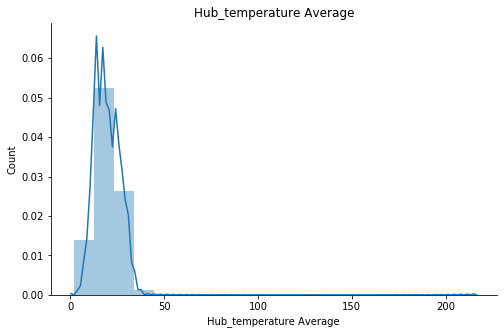

In [115]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Rt_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Hub_temperature Average')
plt.xlabel('Hub_temperature Average')
plt.ylabel('Count')
sns.despine()

In [116]:
print("Skewness: %f" % windfarm['Rt_avg'].skew())
print("Kurtosis: %f" % windfarm['Rt_avg'].kurt())

Skewness: 0.553117
Kurtosis: 8.307905


Skewness slightly > 0 : slightly more weight in the left tail of the distribution (mean < 19.490563).

High kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean. We can se this in 2 big outliers at ~215* C, 419* F.


## Distribution of Apparent_power

In [117]:
windfarm['S_avg'].describe()

count    425151.000000
mean        350.092202
std         442.562535
min           0.000000
25%          31.469999
50%         179.370000
75%         485.235000
max        2060.650000
Name: S_avg, dtype: float64

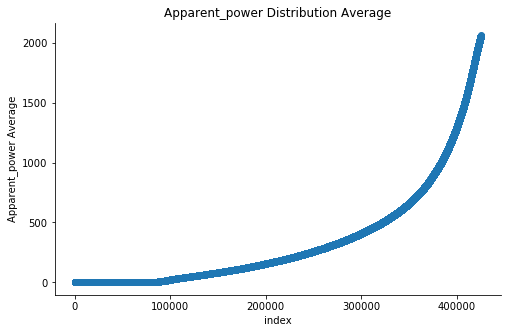

In [118]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['S_avg'].values))
plt.xlabel('index')
plt.ylabel('Apparent_power Average')
plt.title('Apparent_power Distribution Average')
sns.despine()

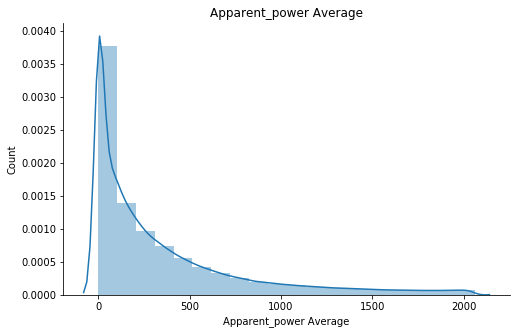

In [119]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['S_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Apparent_power Average')
plt.xlabel('Apparent_power Average')
plt.ylabel('Count')
sns.despine()

In [120]:
print("Skewness: %f" % windfarm['S_avg'].skew())
print("Kurtosis: %f" % windfarm['S_avg'].kurt())

Skewness: 1.787019
Kurtosis: 2.830960


Skewness  > 0 : more weight in the left tail of the distribution (mean < 363.902297).

Leptokurtic distribution at min = 0. Kurtosis of 3 : the data is normally distributed, but that is not the case here.

## Distribution of Vane_position

In [121]:
windfarm['Va_avg'].describe()

count    286646.000000
mean          1.175315
std          24.947662
min        -179.880000
25%          -5.740000
50%          -0.110000
75%           6.440000
max         179.980000
Name: Va_avg, dtype: float64

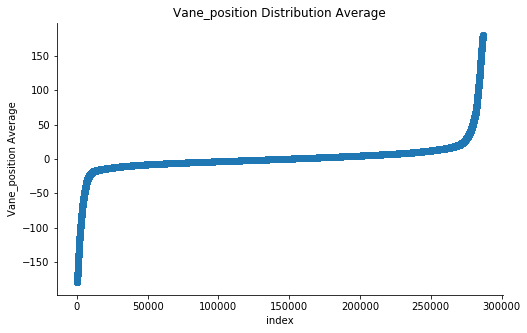

In [122]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Va_avg'].values))
plt.xlabel('index')
plt.ylabel('Vane_position Average')
plt.title('Vane_position Distribution Average')
sns.despine()

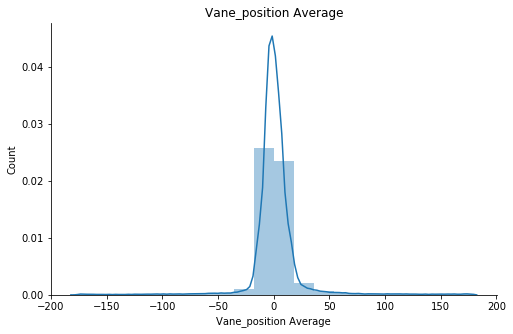

In [123]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Va_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Vane_position Average')
plt.xlabel('Vane_position Average')
plt.ylabel('Count')
sns.despine()

In [124]:
print("Skewness: %f" % windfarm['Va_avg'].skew())
print("Kurtosis: %f" % windfarm['Va_avg'].kurt())

Skewness: 0.533422
Kurtosis: 21.577444


Skewness slightly > 0 : slightly more weight in the left tail of the distribution (mean < 2.209597).

High kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean.

Leptokurtic kurtosis shape around mean and median.

## Distribution of Vane_position_1

**First wind vane on the nacelle**

In [125]:
windfarm['Va1_avg'].describe()

count    138507.000000
mean          0.636745
std          25.652376
min        -179.920000
25%          -5.750000
50%          -0.130000
75%           6.190000
max         179.940000
Name: Va1_avg, dtype: float64

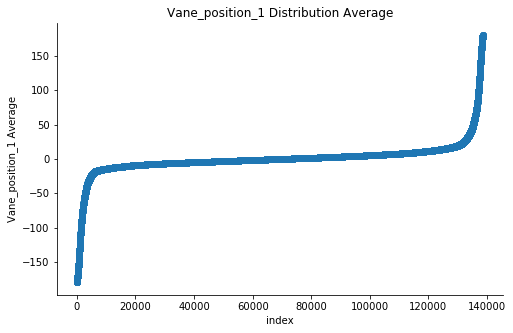

In [126]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Va1_avg'].values))
plt.xlabel('index')
plt.ylabel('Vane_position_1 Average')
plt.title('Vane_position_1 Distribution Average')
sns.despine()

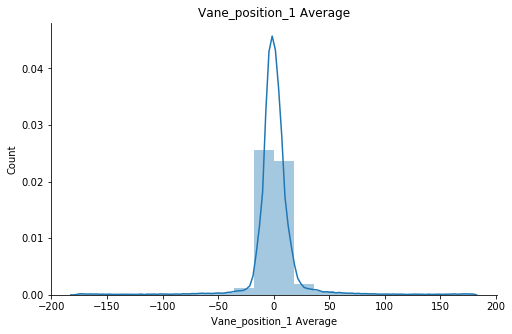

In [127]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Va1_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Vane_position_1 Average')
plt.xlabel('Vane_position_1 Average')
plt.ylabel('Count')
sns.despine()

In [128]:
print("Skewness: %f" % windfarm['Va1_avg'].skew())
print("Kurtosis: %f" % windfarm['Va1_avg'].kurt())

Skewness: 0.054370
Kurtosis: 21.663165


Skewness is basically 0, which means the data is almost perfectly symmetrical.

High kurtosis corresponds to greater extremity of deviations (or outliers).

Leptokurtic kurtosis shape around mean and median, which are both close to 0.

## Distribution of Vane_position_2

**Second wind vane on the nacelle**

In [129]:
windfarm['Va2_avg'].describe()

count    138507.000000
mean          0.636745
std          25.652376
min        -179.920000
25%          -5.750000
50%          -0.130000
75%           6.190000
max         179.940000
Name: Va2_avg, dtype: float64

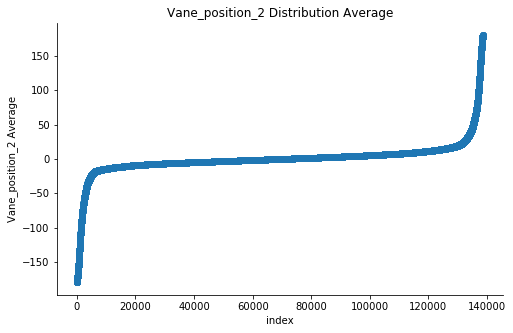

In [130]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Va2_avg'].values))
plt.xlabel('index')
plt.ylabel('Vane_position_2 Average')
plt.title('Vane_position_2 Distribution Average')
sns.despine()

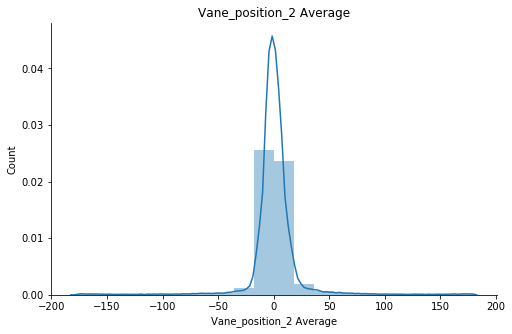

In [131]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Va2_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Vane_position_2 Average')
plt.xlabel('Vane_position_2 Average')
plt.ylabel('Count')
sns.despine()

In [132]:
print("Skewness: %f" % windfarm['Va2_avg'].skew())
print("Kurtosis: %f" % windfarm['Va2_avg'].kurt())

Skewness: 0.054370
Kurtosis: 21.663165


Skewness is basically 0, which means the data is almost perfectly symmetrical.

High kurtosis corresponds to greater extremity of deviations (or outliers).

Leptokurtic kurtosis shape around mean and median, which are both close to 0.

## Distribution of Absolute_wind_direction (in degrees)

In [133]:
windfarm['Wa_avg'].describe()

count    425444.000000
mean        185.076892
std          92.452253
min           0.000000
25%         105.260000
50%         205.495005
75%         250.640000
max         360.000000
Name: Wa_avg, dtype: float64

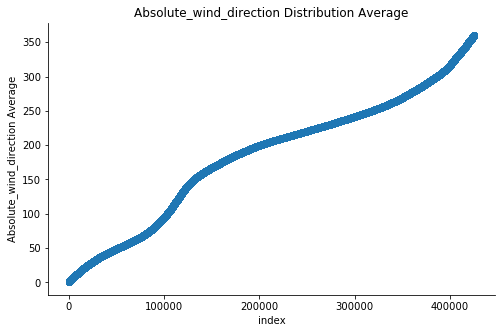

In [134]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Wa_avg'].values))
plt.xlabel('index')
plt.ylabel('Absolute_wind_direction Average')
plt.title('Absolute_wind_direction Distribution Average')
sns.despine()

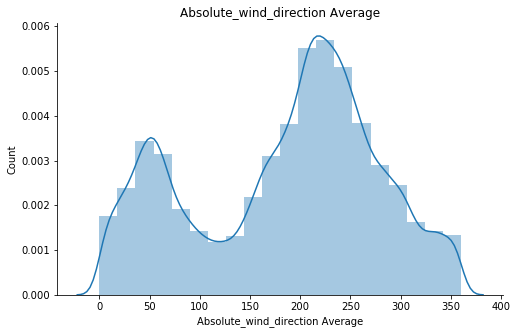

In [135]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Wa_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Absolute_wind_direction Average')
plt.xlabel('Absolute_wind_direction Average')
plt.ylabel('Count')
sns.despine()

In [136]:
print("Skewness: %f" % windfarm['Wa_avg'].skew())
print("Kurtosis: %f" % windfarm['Wa_avg'].kurt())

Skewness: -0.337523
Kurtosis: -0.890058


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 187.611997).

A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Distribution Absolute_wind_direction (in degrees) averages around 50 and another higher peak between 200 - 250 (50% = 206.140000 -> 75% = 249.740000)

## Distribution of Absolute_wind_direction_corrected

In [137]:
windfarm['Wa_c_avg'].describe()

count    243421.000000
mean        181.269165
std          93.911135
min           0.010000
25%          89.309998
50%         203.140000
75%         249.030000
max         360.000000
Name: Wa_c_avg, dtype: float64

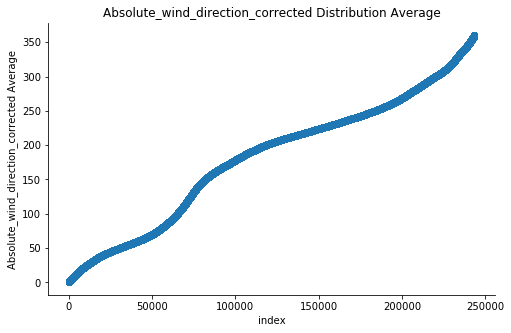

In [138]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Wa_c_avg'].values))
plt.xlabel('index')
plt.ylabel('Absolute_wind_direction_corrected Average')
plt.title('Absolute_wind_direction_corrected Distribution Average')
sns.despine()

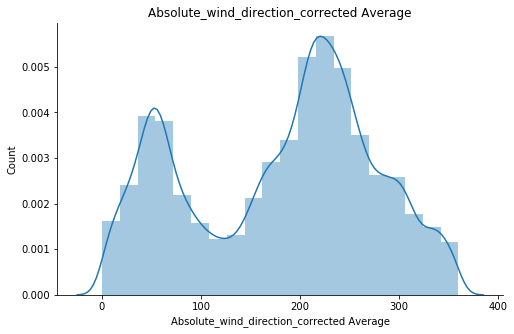

In [139]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Wa_c_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Absolute_wind_direction_corrected Average')
plt.xlabel('Absolute_wind_direction_corrected Average')
plt.ylabel('Count')
sns.despine()

In [140]:
print("Skewness: %f" % windfarm['Wa_c_avg'].skew())
print("Kurtosis: %f" % windfarm['Wa_c_avg'].kurt())

Skewness: -0.256270
Kurtosis: -1.030114


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 173.004551).

A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Distribution Absolute_wind_direction_correceted (in degrees) averages around 50 and another higher peak between 200 - 250 (50% = 192.08 -> 75% ~236.4).

## Distribution of Wind_speed

**Average wind speed**

In [141]:
windfarm['Ws_avg'].describe()

count    425444.000000
mean          5.377080
std           2.614659
min           0.000000
25%           3.910000
50%           5.360000
75%           6.650000
max          24.270000
Name: Ws_avg, dtype: float64

A few outliers around 25?

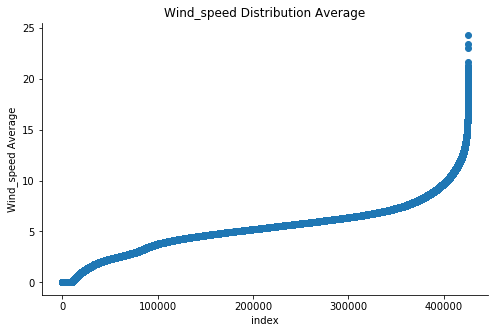

In [142]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Ws_avg'].values))
plt.xlabel('index')
plt.ylabel('Wind_speed Average')
plt.title('Wind_speed Distribution Average')
sns.despine()

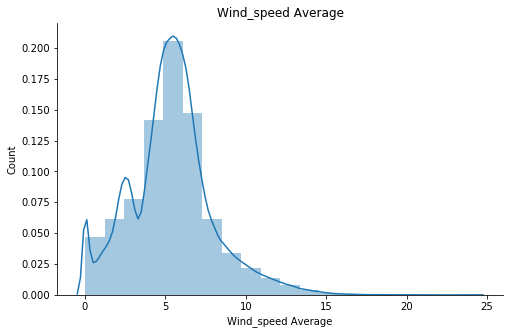

In [143]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Ws_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Wind_speed Average')
plt.xlabel('Wind_speed Average')
plt.ylabel('Count')
sns.despine()

In [144]:
print("Skewness: %f" % windfarm['Ws_avg'].skew())
print("Kurtosis: %f" % windfarm['Ws_avg'].kurt())

Skewness: 0.507591
Kurtosis: 1.200477


Skewness slightly > 0 : slightly more weight in the left tail of the distribution (mean < 5.435598).

Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. 

## Distribution of Wind_speed_1

**First anemometer on the nacelle**

In [145]:
windfarm['Ws1_avg'].describe()

count    424165.000000
mean          5.402663
std           2.677543
min           0.000000
25%           3.930000
50%           5.370000
75%           6.700000
max          24.890000
Name: Ws1_avg, dtype: float64

A few outliers around 25?

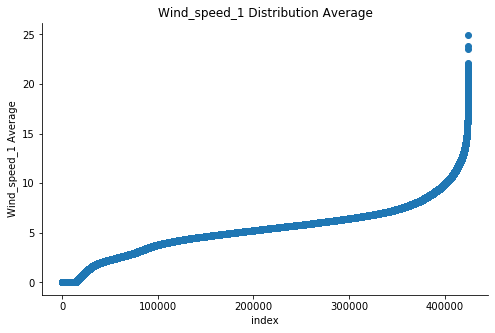

In [146]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Ws1_avg'].values))
plt.xlabel('index')
plt.ylabel('Wind_speed_1 Average')
plt.title('Wind_speed_1 Distribution Average')
sns.despine()

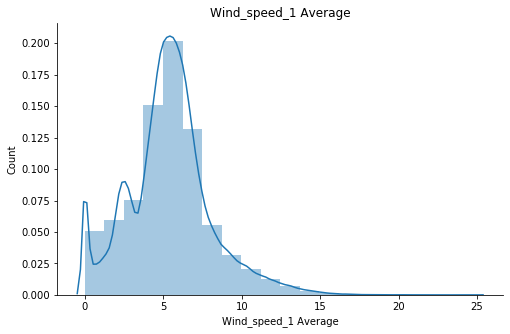

In [147]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Ws1_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Wind_speed_1 Average')
plt.xlabel('Wind_speed_1 Average')
plt.ylabel('Count')
sns.despine()

In [148]:
print("Skewness: %f" % windfarm['Ws1_avg'].skew())
print("Kurtosis: %f" % windfarm['Ws1_avg'].kurt())

Skewness: 0.506863
Kurtosis: 1.259588


Skewness slightly > 0 : slightly more weight in the left tail of the distribution (mean < 5.474906).

Low kurtosis in a data set is an indicator that data has light tails or lack of outliers.

## Distribution of Wind_speed_2

**Second anemometer on the nacelle**

In [149]:
windfarm['Ws2_avg'].describe()

count    424201.000000
mean          5.378500
std           2.551149
min          -0.820000
25%           3.950000
50%           5.360000
75%           6.630000
max          23.650000
Name: Ws2_avg, dtype: float64

A few outliers around 24?

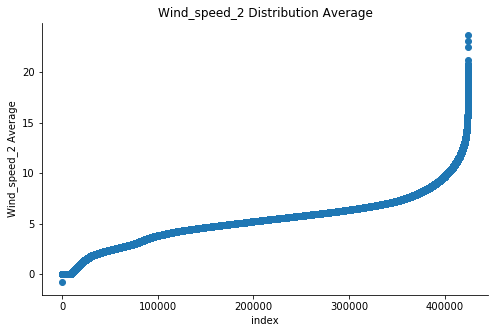

In [150]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Ws2_avg'].values))
plt.xlabel('index')
plt.ylabel('Wind_speed_2 Average')
plt.title('Wind_speed_2 Distribution Average')
sns.despine()

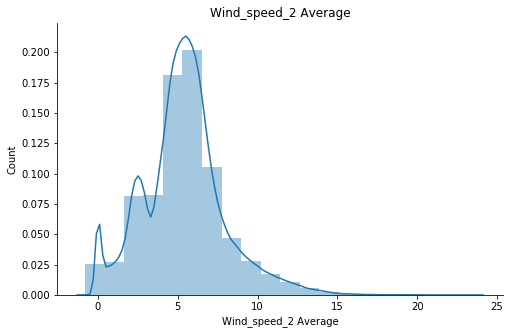

In [151]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Ws2_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Wind_speed_2 Average')
plt.xlabel('Wind_speed_2 Average')
plt.ylabel('Count')
sns.despine()

In [152]:
print("Skewness: %f" % windfarm['Ws2_avg'].skew())
print("Kurtosis: %f" % windfarm['Ws2_avg'].kurt())

Skewness: 0.496224
Kurtosis: 1.216595


Skewness slightly > 0 : slightly more weight in the left tail of the distribution (mean < 5.444454).

Low kurtosis in a data set is an indicator that data has light tails or lack of outliers.

## Distribution of Nacelle_angle

In [153]:
windfarm['Ya_avg'].describe()

count    425444.000000
mean        186.848167
std          92.497659
min           0.000000
25%         110.000000
50%         207.440000
75%         252.259990
max         360.000000
Name: Ya_avg, dtype: float64

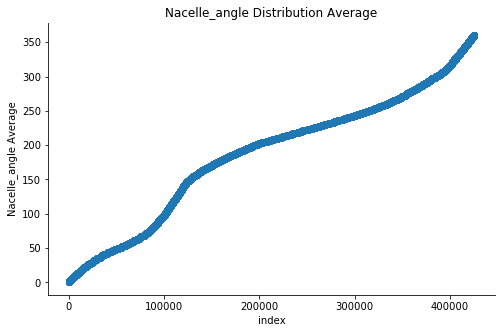

In [154]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Ya_avg'].values))
plt.xlabel('index')
plt.ylabel('Nacelle_angle Average')
plt.title('Nacelle_angle Distribution Average')
sns.despine()

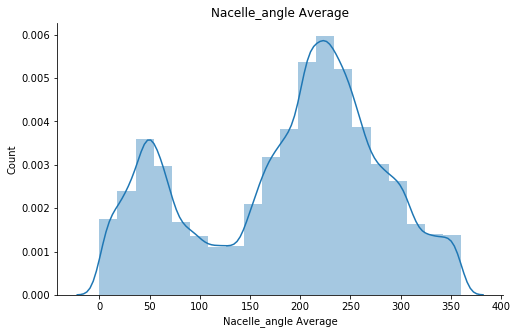

In [155]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Ya_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Nacelle_angle Average')
plt.xlabel('Nacelle_angle Average')
plt.ylabel('Count')
sns.despine()

In [156]:
print("Skewness: %f" % windfarm['Ya_avg'].skew())
print("Kurtosis: %f" % windfarm['Ya_avg'].kurt())

Skewness: -0.374717
Kurtosis: -0.865623


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 189.511210).

A distribution with a negative kurtosis value indicates that the distribution has lighter tails and a flatter peak than the normal distribution.

Nacelle_angle averages around 50 and another higher peak between 200 - 250 (50% ~ 08.2 -> 75% ~ 251).

Similar to Absolute_wind_direction_corrected distribution.

## Distribution of Nacelle_temperature (deg_C)

In [157]:
windfarm['Yt_avg'].describe()

count    425153.000000
mean         24.834307
std           6.960733
min          -1.150000
25%          20.719999
50%          25.590000
75%          29.700001
max          56.090000
Name: Yt_avg, dtype: float64

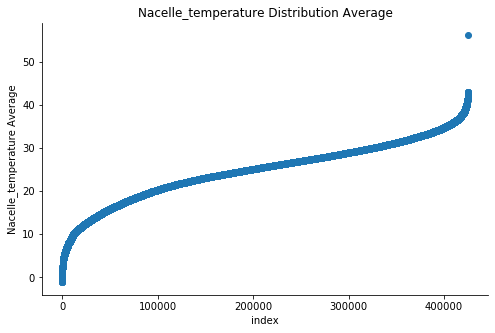

In [158]:
f = plt.figure(figsize=(8,5))

plt.scatter(range(windfarm.shape[0]), np.sort(windfarm['Yt_avg'].values))
plt.xlabel('index')
plt.ylabel('Nacelle_temperature Average')
plt.title('Nacelle_temperature Distribution Average')
sns.despine()

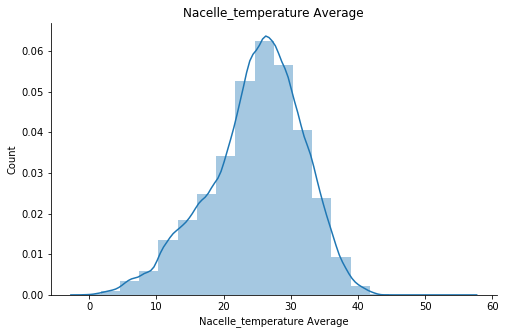

In [159]:
f = plt.figure(figsize=(8,5))

sns.distplot(windfarm['Yt_avg'].dropna(), bins = 20) # drop NaNs
plt.title('Nacelle_temperature Average')
plt.xlabel('Nacelle_temperature Average')
plt.ylabel('Count')
sns.despine()

In [160]:
print("Skewness: %f" % windfarm['Yt_avg'].skew())
print("Kurtosis: %f" % windfarm['Yt_avg'].kurt())

Skewness: -0.479156
Kurtosis: 0.015240


Skewness slightly less than 0 = more weight in the right tail of the distribution (> mean = 24.589399).

Distribution appears to be somewhat normal.

Outlier at 56* C, 132.8 * F.